Run the 4 factor solution with the suggested reduced items

In [1]:
import warnings

import numpy as np
import pandas as pd
import pingouin as pg

import scaledev
from scaledev import modeler, preprocessor, vizer

warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

In [2]:
data_loc = scaledev.get_data_dir()

# Show full dataframes when printing
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.5f" % x)
np.set_printoptions(threshold=100, suppress=True)

# load raw data
df_raw = pd.read_excel(data_loc / "cleaned_ets.xlsx")
df_raw.head()

# Question text
df_question_txt = pd.read_excel(data_loc / "ets_question_text_map.xlsx")

In [3]:
# Clean up the column names
df_raw = preprocessor.clean_columns(df_raw)

# Start data cleaning
df = df_raw.copy()

# Drop the reverse scored item since we decided not to use it
df = df.drop(
    columns=["rs1", "age", "gender", "ethnicity"]
)  # We don't need the raw item

# Sort columns alphabetically
df = df.sort_index(axis=1)

df.head()

,ae1,ae2,ae3,ae4,ae5,ae6,ae7,ae8,ae9,c1,c10,c11,c12,c13,c14,c15,c2,c3,c4,c5,c6,c7,c8,c9,cx1,cx10,cx11,cx12,cx2,cx3,cx4,cx5,cx6,cx7,cx8,cx9,em1,em2,em3,em4,em5,em6,em7,em8,em9,ex1,ex2,ex3,ex4,ex5,ex6,ex7,ex8,se1,se2,sp1,sp2,sp3,sp4,sp5,sp6,t1,t2,t3,to1,to10,to11,to12,to2,to3,to4,to5,to6,to7,to8,to9
0,5,4,4,3,4,4,3,5,4,3,5,5,4,2,4,4,3,4,4,3,3,3,4,5,4,4,4,5,4,4,4,4,5,4,3,4,5,3,4,3,4,3,4,3,3,3,4,4,4,4,3,5,3,4,4,5,5,3,4,4,4,4,3,3,4,4,4,3,5,4,4,5,5,4,3,4
1,4,4,3,4,3,3,2,5,4,2,5,5,5,4,4,3,4,4,3,2,3,3,3,4,2,3,4,3,3,2,4,2,4,2,2,2,5,4,3,4,3,4,4,3,4,2,4,3,5,4,2,5,3,3,4,3,3,3,3,2,3,4,5,5,3,3,4,2,4,4,4,4,3,3,3,3
2,4,2,3,1,1,2,2,3,2,3,2,4,2,1,2,3,3,3,3,3,4,3,4,3,2,2,3,2,1,1,2,1,3,3,1,2,3,1,2,1,2,1,1,4,1,5,1,2,4,1,2,4,3,1,3,3,1,1,2,3,3,1,3,1,3,3,2,3,4,3,2,3,3,3,2,2
3,5,5,6,5,5,5,2,5,5,5,3,5,5,1,3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,5,4,3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5
4,4,5,4,4,3,3,3,1,3,3,2,2,2,2,2,2,3,3,3,3,4,6,2,2,3,4,2,2,3,4,3,4,3,2,3,4,3,2,3,3,3,3,1,1,2,3,3,4,3,3,2,1,3,3,2,4,3,2,3,3,3,2,2,2,4,3,3,2,4,3,2,3,3,3,3,3


In [4]:
# Items to keep based on 4 factor solution in the efa_cleaned_data_v2.ipynb file, after additional reduction of items.filter
filtered_items = [
    "cx9",  # f1
    "c7",
    "sp4",
    "cx10",
    "sp5",
    "ae3",
    "ae6",  # f2
    "to1",
    "ex8",
    "c5",
    "to10",
    "c6",
    "em9",  # f3
    "t1",
    "em7",
    "em4",
    "cx12",
    "cx11",  # f4
    "ae8",
    "c9",
    "cx6",
]

df_efa = df[filtered_items]

## Reliability Analysis/Internal Consistency.

In [5]:
print(
    "Cronbach's Alpha on all items after filtering: ",
    pg.cronbach_alpha(df_efa),
)

Cronbach's Alpha on all items after filtering:  (np.float64(0.9269100223322828), array([0.916, 0.937]))


This is excellent. A Cronbach's Alpha above 0.9 indicates excellent internal consistency. 

This has gone down a little since calculating with all items, but is still excellent. 

# 4 factor solution
Lets follow the same process as above, but for a 4 factor solution. 

In [6]:
# EFA with all features
efa_4_factor = modeler.efa(df=df_efa, n_factors=4)
efa_4_low_loadings = modeler.get_items_with_low_loadings(
    efa_4_factor.loadings_, df_efa.columns, threshold=0.3
)
print("Items where the highest factor loading is less than .3: ")
print(efa_4_low_loadings)

Items where the highest factor loading is less than .3: 
[]


No low loadings - that's good. 

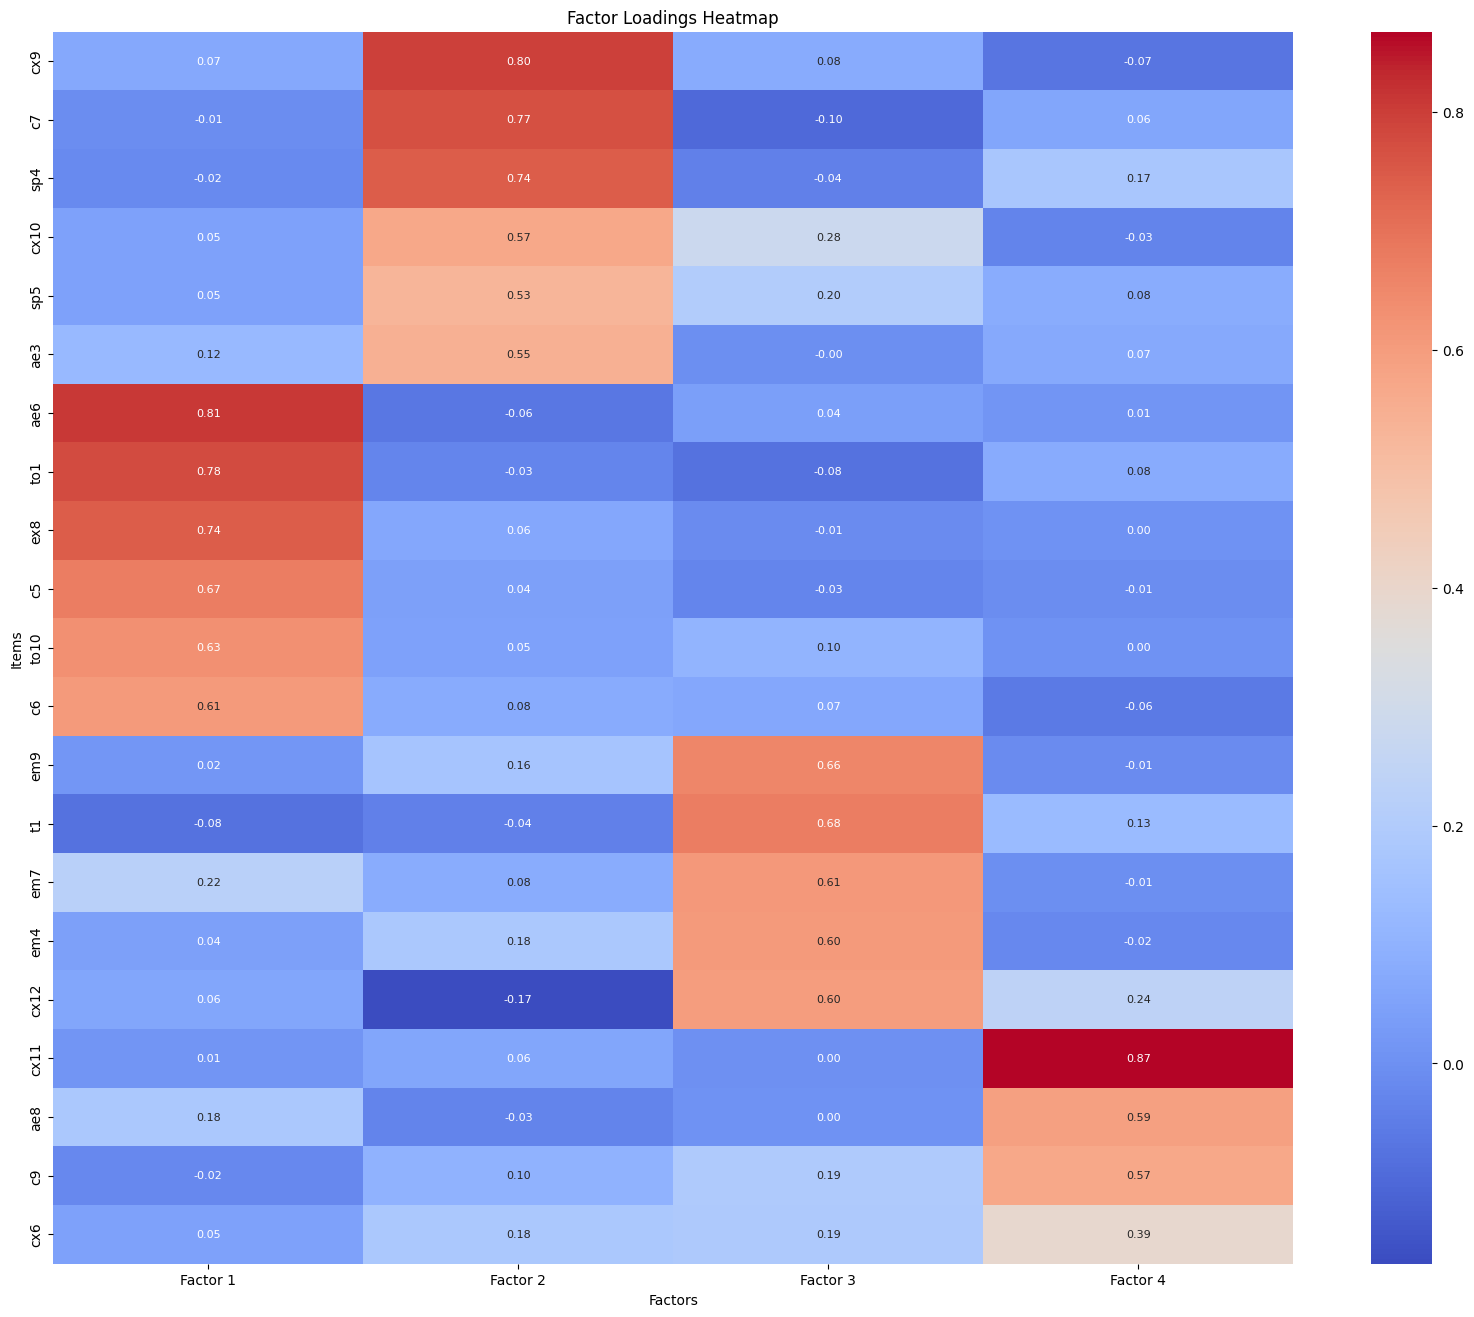

In [7]:
vizer.plot_loadings_heatmap(
    loadings=efa_4_factor.loadings_,
    item_names=df_efa.columns,
    factor_names=[f"Factor {i + 1}" for i in range(efa_4_factor.n_factors)],
)

In [8]:
# Look at the items
df_strongest_loadings = modeler.strongest_loadings(
    efa_4_factor.loadings_, df_efa.columns
)

df_strongest_loadings = pd.merge(
    df_strongest_loadings, df_question_txt, on="item", how="left"
)
df_strongest_loadings

,item,strongest_factor,loading,item_text
0,ae6,1,0.80866,I feel overwhelming compassion for others.
1,to1,1,0.77777,Compassion for others is a priority.
2,ex8,1,0.74271,My heart opens to include others.
3,c5,1,0.67401,My thoughts easily move to how I can help others.
4,to10,1,0.63089,I have become a more giving person.
5,c6,1,0.60865,My thinking expands to include other people.
6,cx9,2,0.79612,I feel a sense of belonging.
7,c7,2,0.76905,My life has purpose and meaning to me.
8,sp4,2,0.74471,I feel a profound sense of belonging.
9,cx10,2,0.57026,I feel fully aligned with life.


Correlation matrix for the items in this solution: 

In [9]:
df_add_totals = df_efa.copy()
df_add_totals["ets_total"] = df_efa.sum(axis=1)

for f in [1, 2, 3, 4]:
    df_add_totals[f"ets_f{f}_total"] = df[
        df_strongest_loadings.loc[
            df_strongest_loadings["strongest_factor"] == f, "item"
        ]
    ].sum(axis=1)

vizer.corr_matrix(df=df_add_totals, cols=df_add_totals.columns)

,cx9,c7,sp4,cx10,sp5,ae3,ae6,to1,ex8,c5,to10,c6,em9,t1,em7,em4,cx12,cx11,ae8,c9,cx6,ets_total,ets_f1_total,ets_f2_total,ets_f3_total,ets_f4_total
cx9,1.000000,0.590837,0.679270,0.645092,0.594108,0.532260,0.366829,0.335147,0.384548,0.290975,0.403681,0.364700,0.432306,0.339017,0.448079,0.429254,0.256330,0.369302,0.273452,0.389333,0.382282,0.708257,0.459071,0.850896,0.486568,0.444194
c7,0.590837,1.000000,0.608954,0.510208,0.490376,0.497049,0.240808,0.231555,0.309367,0.336802,0.282816,0.291746,0.359111,0.183965,0.328148,0.368792,0.158338,0.372845,0.258265,0.283851,0.399282,0.602984,0.361620,0.779992,0.356265,0.413086
sp4,0.679270,0.608954,1.000000,0.538557,0.551155,0.518929,0.290446,0.317287,0.338361,0.309704,0.329749,0.302471,0.405681,0.263240,0.445886,0.402283,0.271634,0.483255,0.372217,0.398263,0.395995,0.685692,0.403822,0.817215,0.457419,0.516034
cx10,0.645092,0.510208,0.538557,1.000000,0.585438,0.471688,0.336419,0.320550,0.381520,0.244985,0.400814,0.350138,0.464993,0.385832,0.491493,0.487941,0.351090,0.382871,0.253320,0.453319,0.440372,0.709351,0.435317,0.787758,0.558881,0.481691
sp5,0.594108,0.490376,0.551155,0.585438,1.000000,0.450456,0.350132,0.327609,0.397349,0.264540,0.314059,0.320632,0.459121,0.358079,0.455777,0.440714,0.332121,0.422736,0.292877,0.498478,0.411555,0.694538,0.422317,0.769680,0.524140,0.510461
ae3,0.532260,0.497049,0.518929,0.471688,0.450456,1.000000,0.330200,0.308579,0.365048,0.332760,0.302719,0.292658,0.375240,0.220799,0.370960,0.314843,0.238454,0.356066,0.291716,0.356777,0.429863,0.625101,0.413038,0.740371,0.388854,0.451096
ae6,0.366829,0.240808,0.290446,0.336419,0.350132,0.330200,1.000000,0.671482,0.583674,0.536357,0.512764,0.509497,0.299068,0.238204,0.424531,0.305909,0.288408,0.335913,0.375604,0.314499,0.315770,0.636040,0.816445,0.403916,0.399150,0.419035
to1,0.335147,0.231555,0.317287,0.320550,0.327609,0.308579,0.671482,1.000000,0.573088,0.468163,0.494904,0.481620,0.237200,0.140115,0.371283,0.251384,0.268318,0.343068,0.337269,0.335181,0.298135,0.597247,0.791510,0.387798,0.325959,0.410412
ex8,0.384548,0.309367,0.338361,0.381520,0.397349,0.365048,0.583674,0.573088,1.000000,0.542365,0.620118,0.501626,0.288583,0.234033,0.393846,0.319617,0.255855,0.357489,0.322582,0.303991,0.285401,0.644933,0.816561,0.458838,0.382299,0.396371
c5,0.290975,0.336802,0.309704,0.244985,0.264540,0.332760,0.536357,0.468163,0.542365,1.000000,0.511607,0.462211,0.316125,0.176991,0.373131,0.235900,0.176013,0.290880,0.304368,0.191072,0.334262,0.565939,0.751298,0.376312,0.325807,0.351088
